### Q1

1. Use R to randomly assign 10 experimental units to each of three treatments (1, 2, and 3). Then simulate
responses for the 30 experimental units satisfying the one-way ANOVA model:

$$Y_{it} = \mu + \tau_i + \epsilon_{it}, i=1,2,...,v, t=1,2,,..., r_i$$

$$\epsilon_{it} \sim N(0, \sigma^2)$$

with $\mu=4.7, \sigma^2=4$, and treatment effects $\tau_1 = -3, \tau_2 = 5, \tau_3=-2$. Your solution should include
your R code and a plot of the simulated values.

In [19]:
treatments.not.random=c(rep("1",10), rep("2",10), rep("3", 10))
treatment=sample(treatments.not.random)
experiment_unit = 1:length(treatment)
table=data.frame(experiment_unit, treatment,row.names=NULL)
table

experiment_unit,treatment
1,1
2,1
3,3
4,3
5,3
6,3
7,2
8,1
9,3
10,2


In [20]:
mu=4.7
tau_1=-3
tau_2=5
tau_3=-2
var=4

means_q1=rep(NA,length(treatment))
means_q1[treatment==1] = mu+tau_1
means_q1[treatment==2] = mu+tau_2
means_q1[treatment==3] = mu+tau_3

y_simulate_q1 = means_q1+rnorm(n = length(means_q1), mean = 0, sd = sqrt(var))
sim_data = data.frame(experiment_unit, treatment, y_simulate_q1)
sim_data

experiment_unit,treatment,y_simulate_q1
1,1,4.77242494
2,1,3.63943901
3,3,2.81940744
4,3,1.05171601
5,3,2.15570919
6,3,3.19044909
7,2,8.46339782
8,1,-0.44447551
9,3,4.26249077
10,2,13.66566167


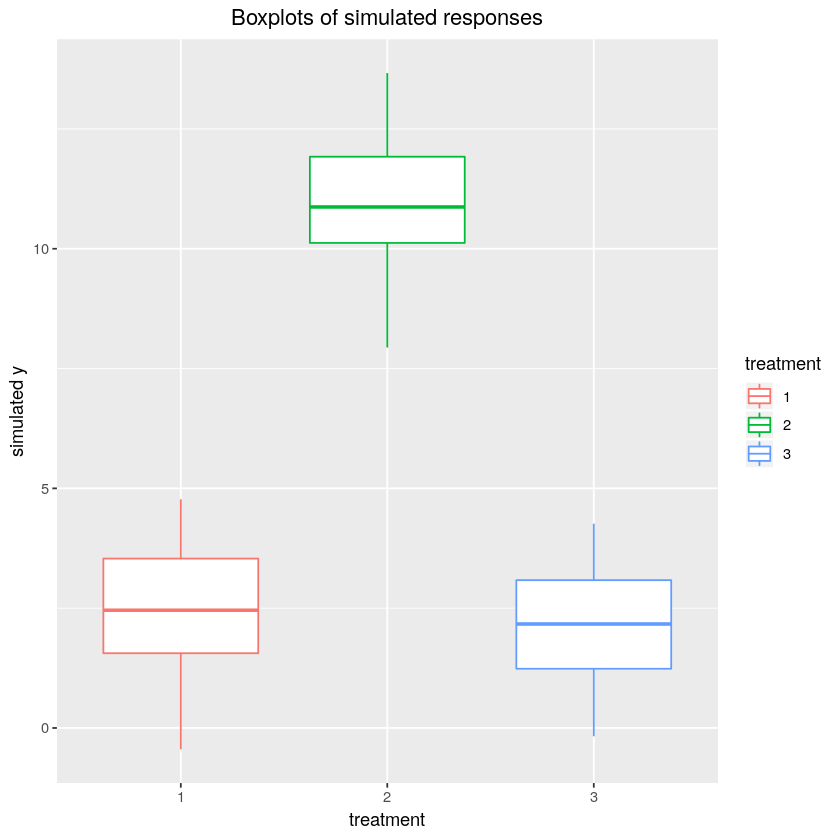

In [21]:
library(ggplot2)
p1<-ggplot(sim_data, aes(x=treatment, y=y_simulate_q1, color=treatment)) +
  geom_boxplot() +
  ylab('simulated y') + 
  ggtitle('Boxplots of simulated responses') +
  theme(plot.title = element_text(hjust = 0.5)) 
p1

### Q2

Consider the situation in Problem 1. The experimenter wants to consider a reduced model where
$\tau 1 = \tau 2 = \tau 3 = 0$. Simulate responses for the 30 experimental units satisfying this reduced model.
Compare boxplots of simulated responses under this reduced model with boxplots of simulated responses
under the full model described in Problem 1 (where there are differences in the treatment effects).

In [22]:
tau_1=0
tau_2=0
tau_3=0

means_q2=rep(NA,length(treatment))
means_q2[treatment==1] = mu+tau_1
means_q2[treatment==2] = mu+tau_2
means_q2[treatment==3] = mu+tau_3

y_simulate_q2 = means_q2+rnorm(n = length(means_q2), mean = 0, sd = sqrt(var))
sim_data = data.frame(experiment_unit, treatment, y_simulate_q2)
sim_data

experiment_unit,treatment,y_simulate_q2
1,1,6.6295126
2,1,3.2651119
3,3,7.5462788
4,3,5.1297482
5,3,3.5201844
6,3,2.2948768
7,2,3.3686518
8,1,5.0375177
9,3,4.4264591
10,2,4.0140078


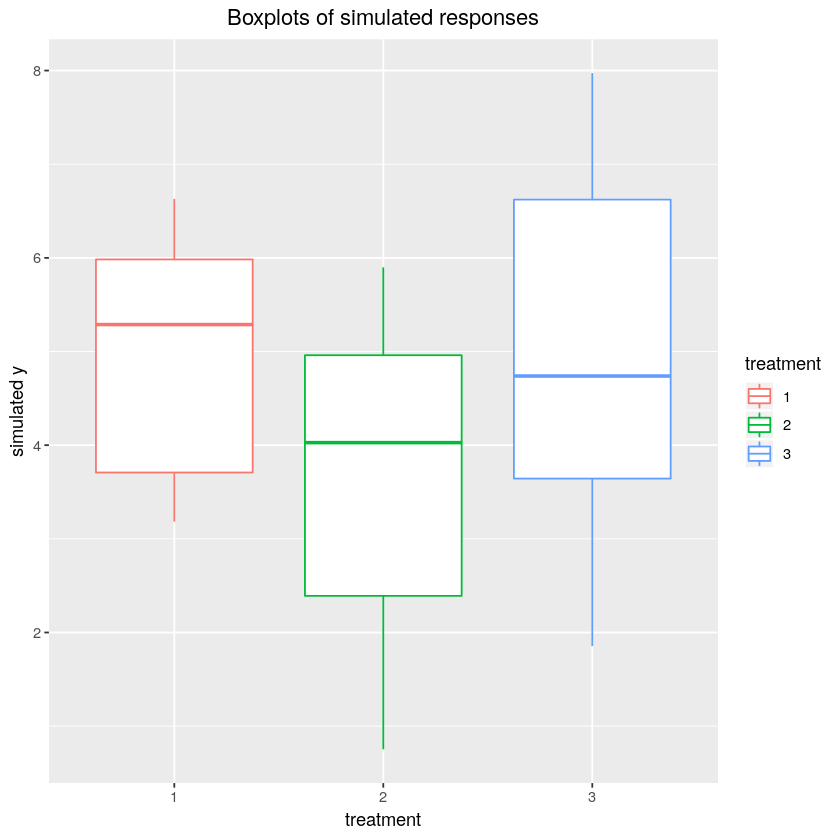

In [23]:
p2<-ggplot(sim_data, aes(x=treatment, y=y_simulate_q2, color=treatment)) +
  geom_boxplot() +
  ylab('simulated y') + 
  ggtitle('Boxplots of simulated responses') +
  theme(plot.title = element_text(hjust = 0.5)) 
p2

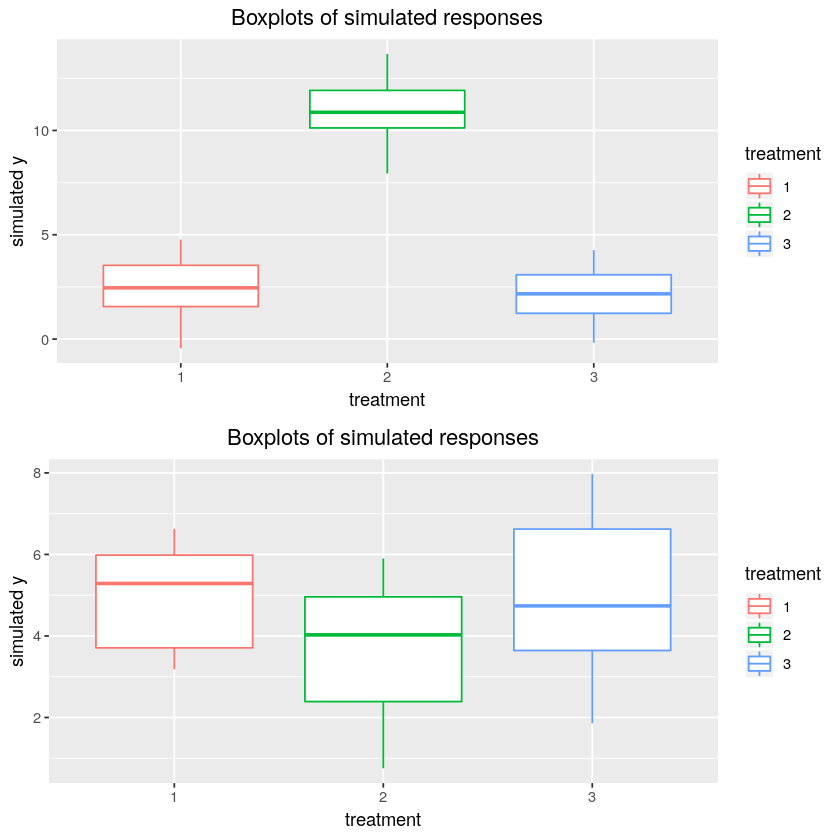

In [24]:
library(gridExtra)
grid.arrange(p1, p2, nrow = 2)

As we can see from the two boxplots above, it's apparent that the means of three treatments of the reduced model are more similar to each other, since:

$$Y_{1.} = \mu + \tau_1 + \epsilon = \mu + \epsilon_{1.}$$
$$Y_{2.} = \mu + \tau_2 + \epsilon = \mu + \epsilon_{2.}$$
$$Y_{3.} = \mu + \tau_3 + \epsilon = \mu + \epsilon_{3.}$$

Other than the normally distributed noise, the mean $\mu$  of all three treatments are basically the same.

### Q3

3.Now explore what happens to data simulated from the model in Problem 1 when the error variance
increases. Try multiple values for $\sigma^2$ and find a value of $\sigma^2$ for which you cannot see any noticable
difference in the boxplots of response values from the three treatments.


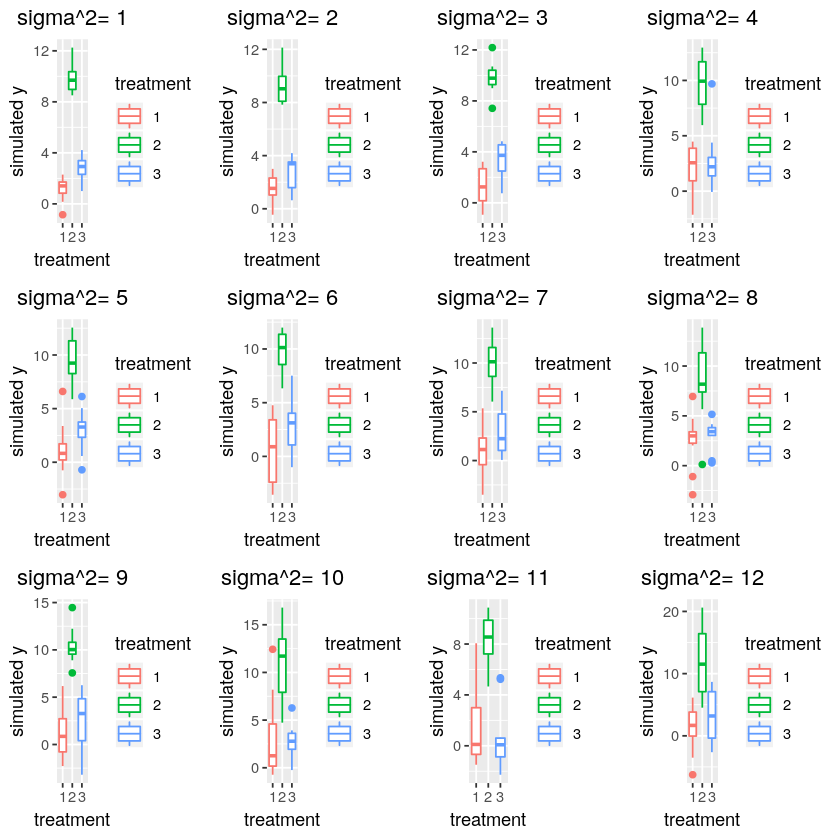

In [25]:
vars = 1:12
boxplots <- list()
for (var in vars){
    y_simulate = means_q1+rnorm(n = length(means_q1), mean = 0, sd = sqrt(var))
    sim_data = data.frame(experiment_unit, treatment, y_simulate)
    p<-ggplot(sim_data, aes(x=treatment, y=y_simulate, color=treatment)) +
              geom_boxplot() +
              ylab('simulated y') + 
              ggtitle(paste('sigma^2=', var)) +
              theme(plot.title = element_text(hjust = 0.5))
    boxplots[[var]] <- p
    }
grid.arrange(grobs = boxplots, nrow=3)

### Q4

Under the model in Problem 1, what is the distribution of $Y_{23}$ , the response from the 3rd experimental
unit to receive treatment 2?


$$Y_{23} = \mu + \tau_2 + \epsilon_{23} = 4.7 + 5 + \epsilon_{23} = 9.7 + \epsilon_{23}$$

$$\epsilon_{23} \sim N(0, 4)$$

$$\therefore Y_{23} \sim N(9.7, 4)$$


### Q5

Under the model in Problem 1, what is the distribution of

$$\bar Y_2 = \frac{1}{r_2} \sum^{r_2}_{t=1} Y_{2t}$$

----

Since 

$$Y_{2t} = \mu + \tau_2 + \epsilon_{2t} = 4.7 + 5 + \epsilon_{2t} = 9.7 + \epsilon_{2t}$$

$$\epsilon_{2t} \sim N(0, 4)$$

$$\therefore Y_{2t} \sim N(9.7, 4)$$

$$\bar Y_2 = \frac{1}{10} \sum^{10}_{t=1} Y_{2t} \sim $$

$$N(9.7\cdot 10 \cdot \frac{1}{10}, 4 \cdot 10 \cdot (\frac{1}{10})^2)$$ 

$$\therefore \bar Y_2 \sim N(9.7, 0.4)$$

### Q6

Since

$$Y_{1t} = \mu + \tau_1 + \epsilon_{1t} = 4.7 - 3 + \epsilon_{1t} = 1.7 + \epsilon_{1t}$$

$$\epsilon_{1t} \sim N(0, 4)$$

$$\therefore Y_{1t} \sim N(1.7, 4)$$

$$Y_{2t} = \mu + \tau_2 + \epsilon_{2t} = 4.7 + 5 + \epsilon_{2t} = 9.7 + \epsilon_{2t}$$

$$\epsilon_{2t} \sim N(0, 4)$$

$$\therefore Y_{2t} \sim N(9.7, 4)$$

Hence

$$E \left [Y_{1t} - Y_{2t} \right ] = E \left [ Y_{1t} \right ] - E \left [ Y_{2t} \right ] = 1.7 - 9.7 = -8$$

$$Var \left (Y_{1t} - Y_{2t} \right ) = Var \left (Y_{1t} \right ) + Var \left (Y_{2t} \right ) = 4+4 = 8$$

$$\therefore Y_{1t} - Y_{2t} \sim N(-8, 8)$$